In [2]:
# 필요한 라이브러리와 모듈을 가져옵니다.
import pandas as pd                 # 데이터 분석 및 조작을 위한 라이브러리
import matplotlib.pyplot as plt     # 데이터 시각화를 위한 라이브러리
import seaborn as sns               # 데이터 시각화를 위한 라이브러리 (Matplotlib보다 더 미려한 그래프를 제공)

# CSV 파일을 읽어와서 DataFrame으로 변환합니다.
#  - './data/pima-indians-diabetes.csv': CSV 파일의 경로
#  - names: 각 열에 사용할 이름을 지정합니다.
df = pd.read_csv('./data/pima-indians-diabetes.csv',
                 names=["pregnant", "plasma", "pressure", "thickness", 
                        "insulin", "BMI", "pedigree", "age", "class"])

# 데이터의 처음 5개 행을 출력합니다.
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [6]:
# 데이터 중 임신 정보와 클래스 만을 
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [8]:
# 'pregnant' 열을 기준으로 그룹화하여 각 임신 횟수에 따른 'class'의 평균값을 계산합니다.
#  - df[['pregnant', 'class']]: 'pregnant'와 'class' 열만 선택하여 새로운 DataFrame을 생성합니다.
#  - .groupby(['pregnant'], as_index=False): 'pregnant' 열을 기준으로 그룹화하고, 인덱스를 유지하지 않습니다.
#  - ['class'].mean(): 그룹별로 'class' 열의 평균값을 계산합니다.
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False)['class'].mean()

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [ ]:
# 이 코드는 임신 횟수(pregnant)에 따라 당뇨병 여부(class의 평균값)를 계산합니다. 여기서 class의 평균값은 각 임신 횟수에 대해 당뇨병 발생 비율을 의미합니다. 
# 예를 들어, pregnant가 1일 때의 class 평균이 0.2라면, 임신 횟수가 1인 경우에 당뇨병이 발생할 확률이 20%라는 의미입니다.

In [9]:
# 데이터 가공하기 : 임신횟수와 당뇨병 발병 확률
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


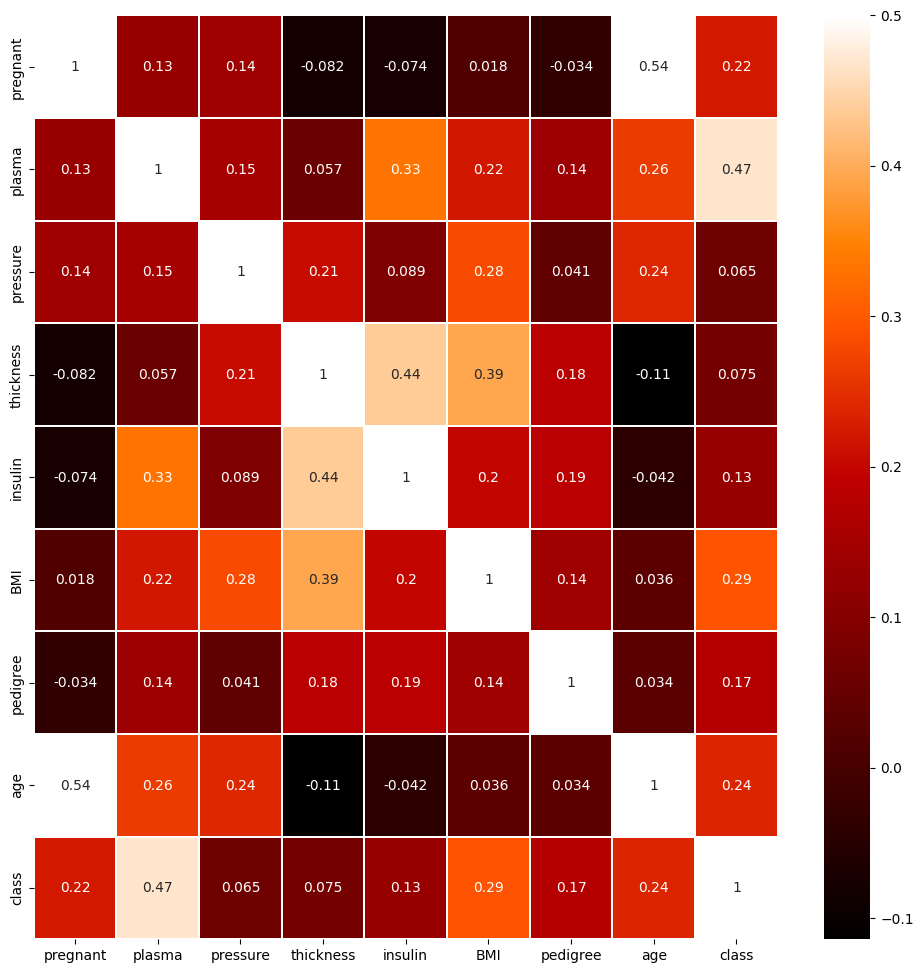

In [10]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.
# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot = True)
plt.show()

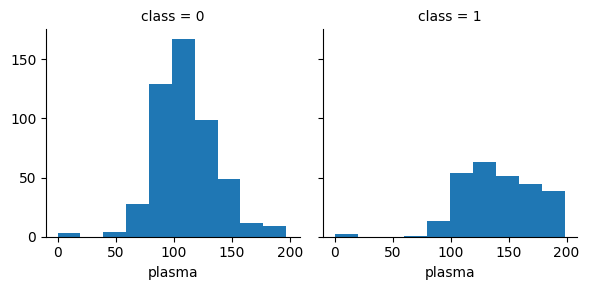

In [13]:
# Seaborn의 FacetGrid를 사용하여 데이터의 특정 열에 대한 히스토그램을 시각화합니다.
#  - df: 사용할 DataFrame (Pima Indians Diabetes 데이터셋)
#  - col='class': 'class' 열을 기준으로 데이터를 나누어 각각 별도의 히스토그램을 생성합니다.
grid = sns.FacetGrid(df, col='class')

# 히스토그램을 그립니다.
#  - plt.hist: 히스토그램을 그리는 함수
#  - 'plasma': 히스토그램에 사용할 데이터 (공복 혈당)
#  - bins=10: 히스토그램의 막대(bin) 개수를 10개로 설정
grid.map(plt.hist, 'plasma', bins=10)

# 생성한 히스토그램을 화면에 표시합니다.
plt.show()

In [14]:
# 필요한 라이브러리와 모듈을 가져옵니다.
from tensorflow.keras.models import Sequential  # 신경망 모델을 순차적으로 구성할 때 사용하는 클래스
from tensorflow.keras.layers import Dense       # 완전 연결(Dense) 레이어를 추가할 때 사용하는 클래스
import numpy                                    # 수치 계산을 위한 라이브러리
import tensorflow as tf                         # 딥러닝 프레임워크

# 랜덤 시드를 고정하여 실행할 때마다 동일한 결과를 얻도록 설정합니다.
numpy.random.seed(3)       # numpy의 랜덤 시드 고정
tf.random.set_seed(3)      # TensorFlow의 랜덤 시드 고정

# 데이터를 불러옵니다.
#  - numpy.loadtxt: CSV 파일을 불러와서 numpy 배열로 변환
#  - "./data/pima-indians-diabetes.csv": 데이터 파일의 경로
#  - delimiter=",": CSV 파일의 구분자를 쉼표(,)로 설정
dataset = numpy.loadtxt("./data/pima-indians-diabetes.csv", delimiter=",")

# 입력 데이터(X)와 출력 데이터(Y)로 나눕니다.
#  - X: 데이터셋의 0번째부터 7번째 열까지 (입력 변수 8개)
#  - .astype(float): 데이터를 float형으로 변환
X = dataset[:, 0:8].astype(float)

# Y: 데이터셋의 8번째 열 (출력 변수)
#  - .astype(float): 데이터를 float형으로 변환
Y = dataset[:, 8].astype(float)

In [15]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)
# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

C:\Users\imeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5957 - loss: 13.5680
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5165 - loss: 1.5245
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6096 - loss: 1.0430
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6281 - loss: 0.9240
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6168 - loss: 0.8574
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6189 - loss: 0.8038
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6236 - loss: 0.7644
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6361 - loss: 0.7379
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 0.7168
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6524 - loss: 0.7067
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6416 - loss: 0.7028
Epoch 12/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy